# Counting Labels
One way to avoid having class imbalance imapct the loss function is to weight the losses differently. To choose the weights, the class frequencies are calculated.

In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read csv file containing training data
train_df = pd.read_csv("nih/train-small.csv")

In [3]:
# Count up the number of instances of each class (drop non-class columns from the counts)
class_counts = train_df.sum().drop(['Image', 'PatientId'])

In [4]:
for column in class_counts.keys():
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


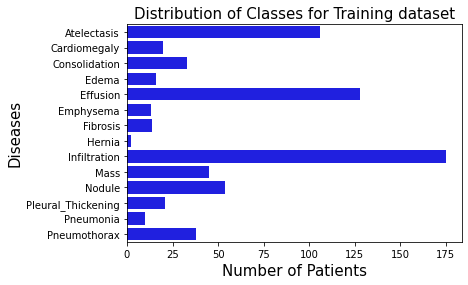

In [7]:
# Plot up the distribution of counts
sns.barplot(class_counts.values, class_counts.index, color='b')
plt.title('Distribution of Classes for Training dataset', fontsize=15)
plt.xlabel('Number of Patients', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
plt.show()

As it's possible to observe, the distribution of instances between the classes is not balanced

## Weighted Loss Function
A hypothetical set of true labels will be defined and then a set of random predictions.

In [8]:
# Generate an array of 10 binary label values, 7 positive and 3 negative, then reshape to a column
y_true = np.array([1,1,1,1,1,1,1,0,0,0]).reshape(10, 1)
print(y_true, y_true.shape)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]] (10, 1)


In [9]:
# Generate an array of random predictions (either 0 or 0.9 for each) and reshape the column
y_predict = np.random.randint(0, 2, 10).reshape(10, 1) * 0.9
print(y_predict, y_predict.shape)

[[0.9]
 [0. ]
 [0.9]
 [0. ]
 [0.9]
 [0.9]
 [0. ]
 [0. ]
 [0. ]
 [0.9]] (10, 1)


The Next two cells will define positive and negative weights and a value of epsilon to be used in the loss function

In [10]:
# Define positive and negative weights to be used in the loss function
# The positive weight is determined by the fraction of labels that are negative (3/10 in this case)
positive_weight = 0.3
# The negative weight is determined by the fraction of labels that are positive (7/10 in this case)
negative_weight = 0.7

In [11]:
# Define a value "epsilon" to be used in calculating the loss
# This value is just used to avoid an error due to taking the log of zero
epsilon = 1e-7

## Weighted Loss Equation
Calculate the loss for the zero-th label (column at index 0)

- The loss is made up of two terms:
    - $loss_(pos)$: we'll use this to refer to the loss where the actual label is positive (the positive examples)
    - $loss_(neg)$: we'll use this to refer to the loss where the actual label is negative (the negative examples)
- Note that within the $log()$ function, we'll add a tiny positive value, to avoid an error if taking the log of zero

$$ loss^{(i)} = loss_(pos)^{(i)} + loss_(neg)^{(i)} $$
$$ loss_{pos}^{(i)} = -1 \times weight_{pos}^{(i)} \times y^{(i)} \times log(\hat{y}^{(i)} + \epsilon)$$
$$ loss_{neg}^{(i)} = -1 \times weight_{neg}^{(i)} \times (1 - y^{(i)}) \times log(1 - \hat{y}^{(i)} + \epsilon)$$
$$\epsilon = \text{a tiny positive number}$$

In [13]:
# Calculate and print out the positive loss
positive_loss = -1 * np.sum(positive_weight *
                y_true *
                np.log(y_predict + epsilon)
                )
print(positive_loss)

14.632718571318554


In [14]:
# Calculate the print our the negative loss
negative_loss = -1 * np.sum(negative_weight *
                (1 - y_true) *
                np.log(1 - y_predict + epsilon)
                )
print(negative_loss)

1.6118087250961888


In [15]:
# Sum positive and negative losses to calculate total loss
total_loss = positive_loss + negative_loss
print(total_loss)

16.24452729641474
